# Evaluation

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import DataReader as pdr
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [15]:
rets = pd.read_csv("rets.csv", parse_dates=["date"], index_col="date")
rets.index = rets.index.to_period("M")

In [16]:
ff = pdr("F-F_Research_Data_5_Factors_2x3", "famafrench", start=2005)[0]/100
rets["mkt"] = ff["Mkt-RF"] + ff["RF"]

# Ecample Accumulation Plot

<AxesSubplot:xlabel='date'>

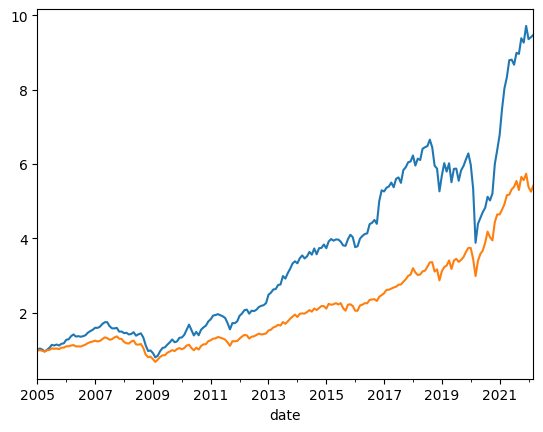

In [18]:
(1+rets['best']).cumprod().plot()
(1+rets['mkt']).cumprod().plot()

# Example Drawdown Plot

Text(0, 0.5, 'Drawdown')

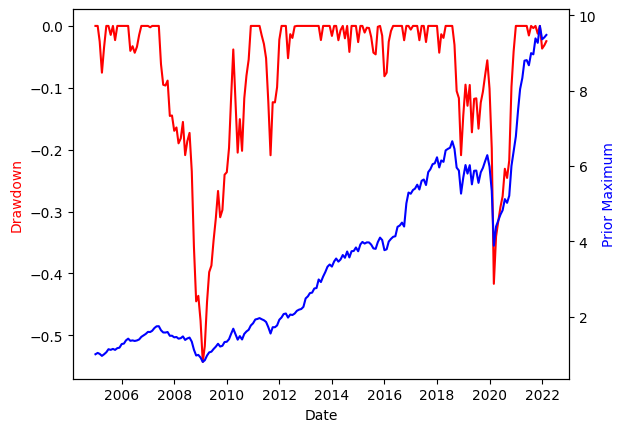

In [17]:
accum = (1+rets['best']).cumprod()
accum_max = accum.expanding().max()
drawdown = accum/accum_max - 1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(rets.index.to_timestamp(), accum, 'b-')
ax1.plot(rets.index.to_timestamp(), drawdown, 'r-')

ax1.set_xlabel('Date')
ax2.set_ylabel('Prior Maximum', color='b')
ax1.set_ylabel('Drawdown', color='r')